In [ ]:
# Task 1: Load a CSV Dataset
# Description: Load a CSV file into a Pandas DataFrame and print the first five rows to understand the structure of the dataset.





In [ ]:
# Task 2: Check for Missing Values
# Description: Identify and list the columns with missing values and the number of missing values in each.



In [ ]:
# Task 3: Visualize Missing Data
# Description: Use a heatmap to visualize the missing values in the dataset.





In [ ]:
# Task 4: Remove Columns with Many Missing Values
# Description: Drop columns that have more than 50% missing values.




In [ ]:
# Task 5: Identify Duplicate Rows
# Description: Check for and display any duplicate rows in the dataset.




In [ ]:
# Task 6: Remove Duplicate Rows
# Description: Remove duplicate rows from the dataset and verify that they have been removed.




In [ ]:
# Task 7: Check Data Inconsistencies
# Description: Identify inconsistencies in categorical columns, such as differing text cases or trailing spaces.




In [ ]:
# Task 8: Get Summary of Data Quality
# Description: Generate a summary of data quality including total records, number of duplicate rows, and columns with missing values.




In [ ]:
# Task 9: Generate a Data Quality Report
# Description: Create a comprehensive data quality report that includes not only missing values but also basic statistics for numerical columns and the distribution of categorical columns.




In [ ]:
# Task 10: Advanced Data Imputation
# Description: Perform advanced data imputation by replacing missing values in numerical columns with the mean and categorical columns with the mode.





Task 1: First five rows of the dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst

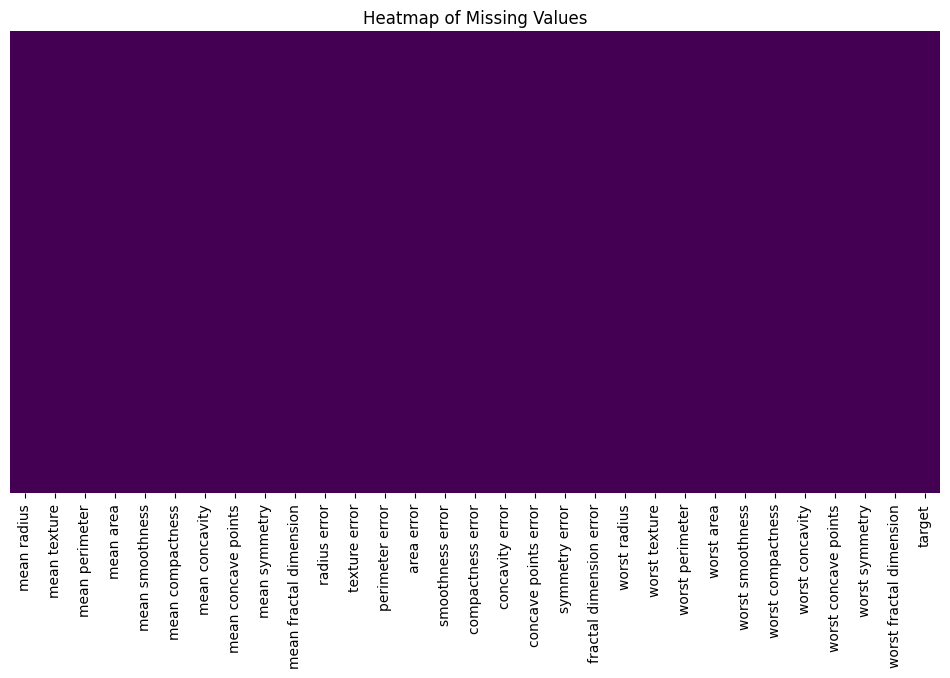


Task 4: Dropped columns with >50% missing values: []

Task 5: Number of duplicate rows: 0
Empty DataFrame
Columns: [mean radius, mean texture, mean perimeter, mean area, mean smoothness, mean compactness, mean concavity, mean concave points, mean symmetry, mean fractal dimension, radius error, texture error, perimeter error, area error, smoothness error, compactness error, concavity error, concave points error, symmetry error, fractal dimension error, worst radius, worst texture, worst perimeter, worst area, worst smoothness, worst compactness, worst concavity, worst concave points, worst symmetry, worst fractal dimension, target]
Index: []

[0 rows x 31 columns]

Task 6: Duplicate rows removed. Current shape: (569, 31)

Task 7: Checking for inconsistencies in object columns...

Task 8: Data Quality Summary:
{'Total Records': 569, 'Number of Duplicate Rows Removed': 0, 'Columns with Missing Values': {}}

Task 9: Data Quality Report
Missing Values:
mean radius                0
mean tex

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Task 1: Load a Dataset from sklearn
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print("Task 1: First five rows of the dataset:")
print(df.head())

# Task 2: Check for Missing Values
print("\nTask 2: Missing values per column:")
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

# Task 3: Visualize Missing Data
print("\nTask 3: Heatmap of missing values:")
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Heatmap of Missing Values")
plt.show()

# Task 4: Remove Columns with More Than 50% Missing Values
threshold = 0.5 * len(df)
cols_to_drop = df.columns[df.isnull().sum() > threshold]
df = df.drop(columns=cols_to_drop)
print(f"\nTask 4: Dropped columns with >50% missing values: {list(cols_to_drop)}")

# Task 5: Identify Duplicate Rows
duplicate_rows = df[df.duplicated()]
print(f"\nTask 5: Number of duplicate rows: {len(duplicate_rows)}")
print(duplicate_rows)

# Task 6: Remove Duplicate Rows
df = df.drop_duplicates()
print(f"\nTask 6: Duplicate rows removed. Current shape: {df.shape}")

# Task 7: Check Data Inconsistencies (not relevant here but included)
print("\nTask 7: Checking for inconsistencies in object columns...")
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"\nUnique values in '{col}' before cleaning:")
    print(df[col].unique())
    df[col] = df[col].str.strip().str.lower()

# Task 8: Get Summary of Data Quality
summary = {
    "Total Records": len(df),
    "Number of Duplicate Rows Removed": len(duplicate_rows),
    "Columns with Missing Values": df.isnull().sum()[df.isnull().sum() > 0].to_dict()
}
print("\nTask 8: Data Quality Summary:")
print(summary)

# Task 9: Generate a Data Quality Report
print("\nTask 9: Data Quality Report")
print("Missing Values:")
print(df.isnull().sum())
print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe())
print("\nValue Counts for Categorical Columns:")
for col in cat_cols:
    print(f"\n{col}:\n{df[col].value_counts()}")

# Task 10: Advanced Data Imputation
print("\nTask 10: Imputing missing values...")
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values after imputation:")
print(df.isnull().sum())
